<a href="https://colab.research.google.com/github/shahdabuhassanien/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author :Shahd Abu Hassanien

##Project Overview

##Load and Inspect Data

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data

1) How many rows and columns?
rows : 8523 columns :12

2) What are the datatypes of each variable?

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


3) Are there duplicates? If so, drop any duplicates.

In [ ]:
duplicatedvar=df.duplicated()
df[duplicatedvar]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


4) Identify missing values

In [ ]:
missingvar=df.isna()
missingvar.sum()
# Item_Weight ,Outlet_Size
# cheack the data type of Item_Weight
df["Item_Weight"].dtypes

dtype('float64')

In [ ]:
# cheack the data type of Outlet_Size
df["Outlet_Size"].dtypes

dtype('O')

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

In [ ]:
# fill missing value of item wight with -1
df["Item_Weight"]=df["Item_Weight"].fillna(-1)
df["Item_Weight"].isna().sum()

np.int64(0)

In [ ]:
df["Outlet_Size"]=df["Outlet_Size"].fillna("MISSING")
df["Item_Weight"].isna().sum()

np.int64(0)

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
# will we create a for loop to check the value_counts
for i in df.columns:
  print(df[i].value_counts())
  print("\n")
# Item_Fat_Content  low fat ,LF,Low Fat  .
# reg,Regular

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 5.210        2
 9.420        1
 7.685        1
 5.400        1
 6.520        1
Name: count, Length: 416, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
He

In [ ]:
# fix inconsistent
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(["LF","Low Fat"],"low fat")
df['Item_Fat_Content']=df['Item_Fat_Content'].replace("reg","Regular")

# check
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
low fat,5517
Regular,3006


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
numvar=df.select_dtypes("number").columns
for i in numvar:
  print(df[i].describe())
  print("\n")


count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.

##Exploratory Data Analysis

1)Histograms to view the distributions of numerical features in your dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


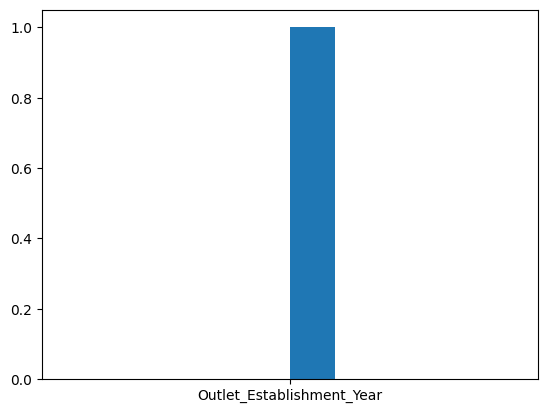

In [ ]:
fig,ax=plt.subplots()
ax.hist("Outlet_Establishment_Year");

Boxplots to view statistical summaries of numerical features in your dataset

<Axes: ylabel='Item_Weight'>

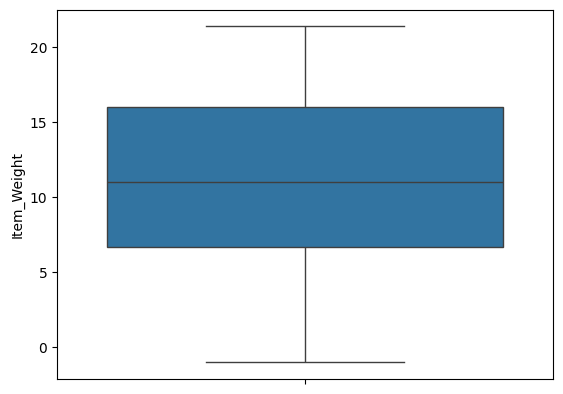

In [ ]:
sns.boxplot(data=df,y="Item_Weight")

Countplots to view the frequency of each class of categorial features in your dataset.

/tmp/ipython-input-15-1029357469.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(data=df,x="Item_Type").set_xticklabels(plt.gca().get_xticklabels(),rotation=-45);


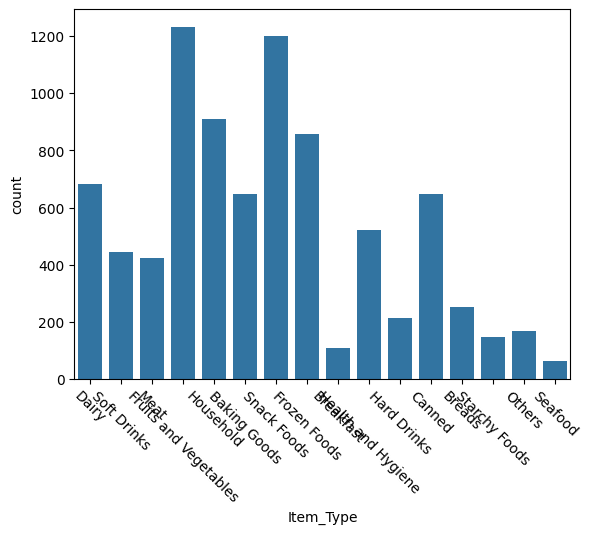

In [ ]:
sns.countplot(data=df,x="Item_Type").set_xticklabels(plt.gca().get_xticklabels(),rotation=-45);

Heatmap to view the correlation between features.

<Axes: >

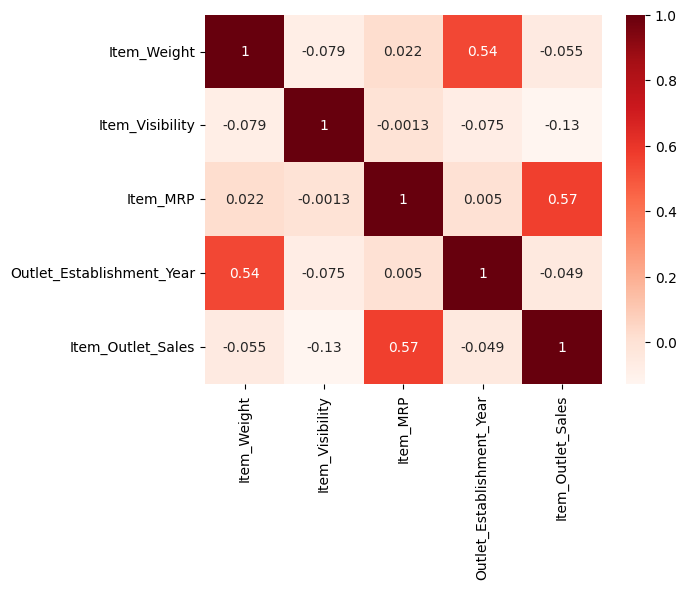

In [ ]:
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,cmap="Reds",annot=True)